In [1]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the daatset
df_emp=pd.read_csv('D:/data_analyst/AnalyticsProjects/projects/Employee_Attrition_Analysis/HR-Employee-Attrition.csv')

print(df_emp.shape)
df_emp.head(5)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# check for nulls and data types
print(df_emp.info())
print(df_emp.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Drop Columns not useful for analysis
df_emp.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [8]:
# Convert binary categorical variables
binary_map={'Yes':1,'No':0}
df_emp['Attrition']=df_emp['Attrition'].map(binary_map)
df_emp['OverTime']=df_emp['OverTime'].map(binary_map)


In [16]:
# Encode categorical variables (Label Encoding or One-Hot Encoding)
categorical_cols = df_emp.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols.tolist())

df_emp = pd.get_dummies(df_emp, columns=categorical_cols, drop_first=True)

# Optimize dtypes: convert numeric columns with small ranges to smaller types
int_cols = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
            'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
            'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in int_cols:
    df[col] = df[col].astype('int16')

df['Attrition'] = df['Attrition'].astype('int8')
df['OverTime'] = df['OverTime'].astype('int8')
df['MonthlyIncome'] = df['MonthlyIncome'].astype('int32')
df['HourlyRate'] = df['HourlyRate'].astype('int16')

# Optimize dummy variables
for col in df.columns:
    if df[col].nunique() == 2 and df[col].dtype == 'uint8':
        df[col] = df[col].astype('uint8')

# Save cleaned dataset
df_emp.to_csv('D:/data_analyst/AnalyticsProjects/projects/employee_data.csv', index=False)
print("Data cleaned and saved successfully.")

# View final shape
print("Final shape:", df_emp.shape)
df_emp.head()

Categorical Columns: []
Data cleaned and saved successfully.
Final shape: (1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,92,2,1,3,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,40,3,1,2,...,False,True,False,False,False,False,False,False,True,False


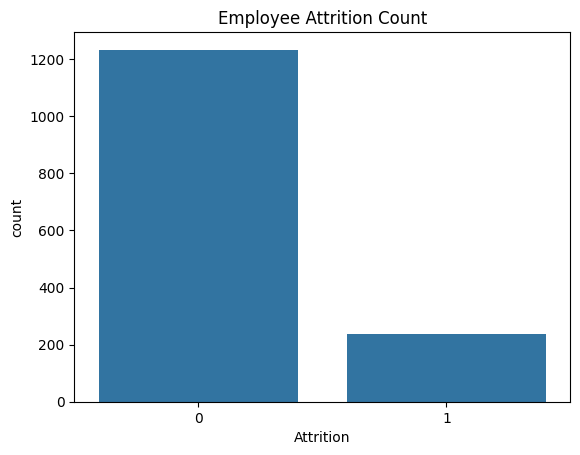

In [10]:
# Load cleaned data
df = pd.read_csv('D:/data_analyst/AnalyticsProjects/projects/employee_data.csv')

# Distribution of Attrition
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count')
plt.show()


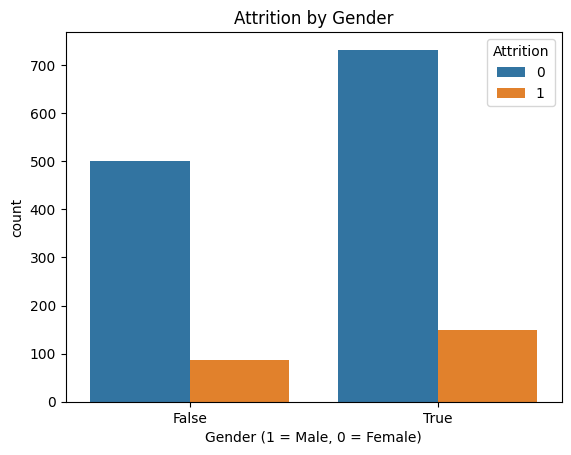

In [11]:
# Attrition by Gender
sns.countplot(x='Gender_Male', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.show()

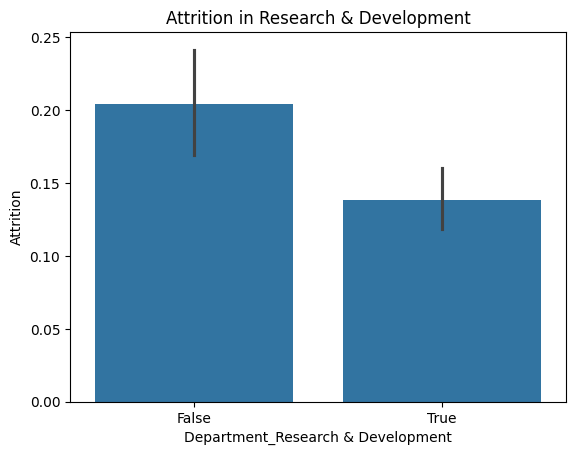

In [12]:
# Attrition by Department
sns.barplot(x='Department_Research & Development', y='Attrition', data=df)
plt.title('Attrition in Research & Development')
plt.show()


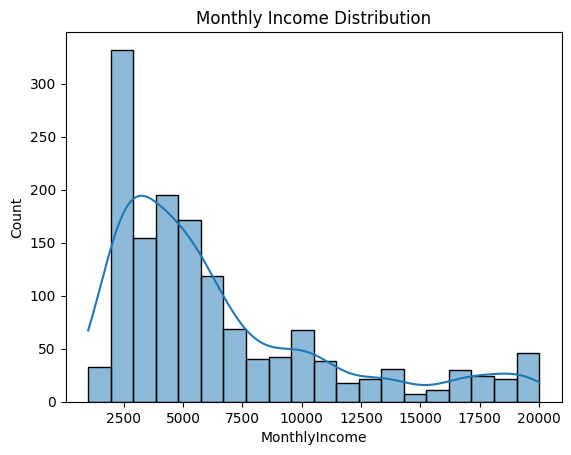

In [13]:
# MonthlyIncome Distribution
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title('Monthly Income Distribution')
plt.show()


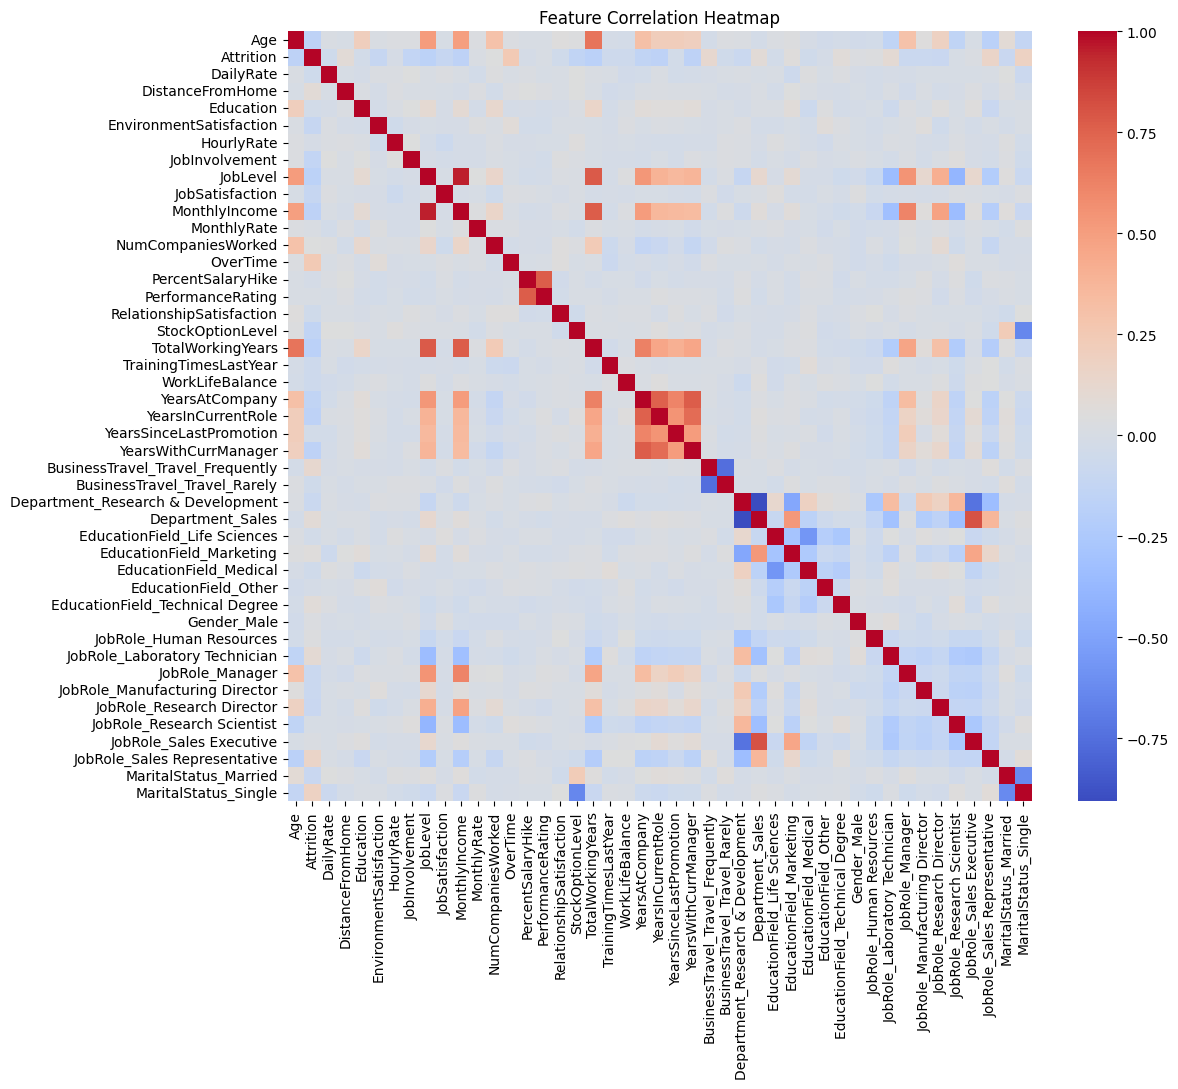

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


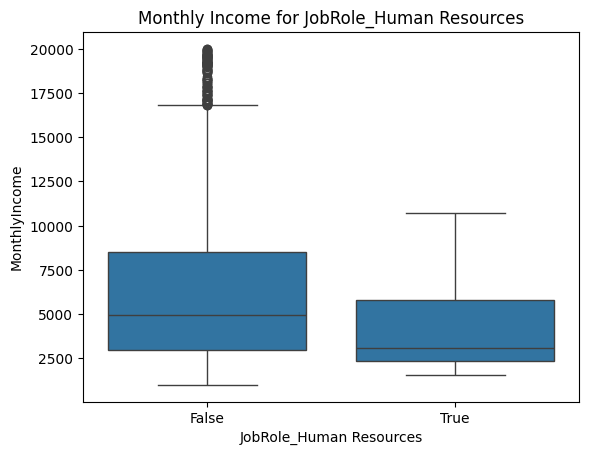

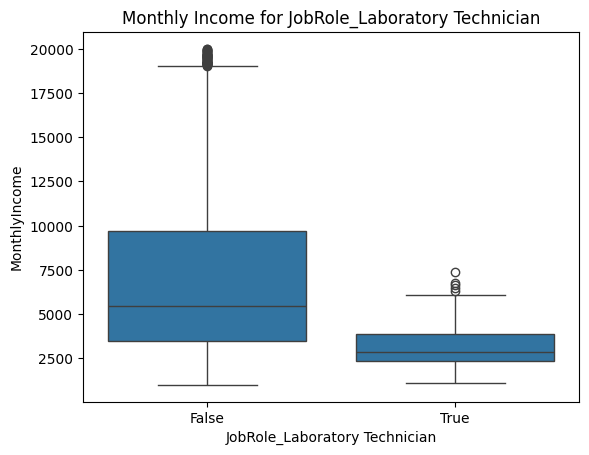

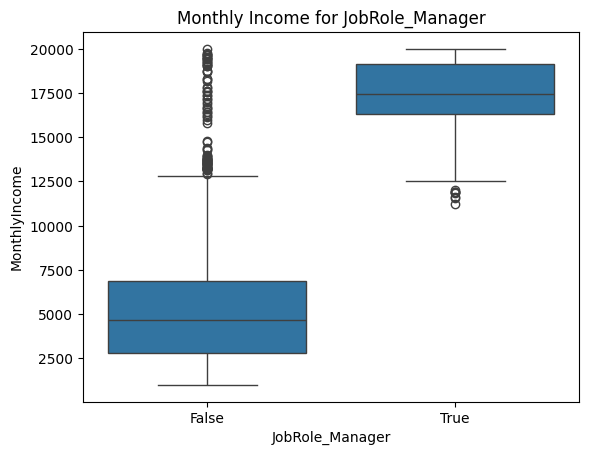

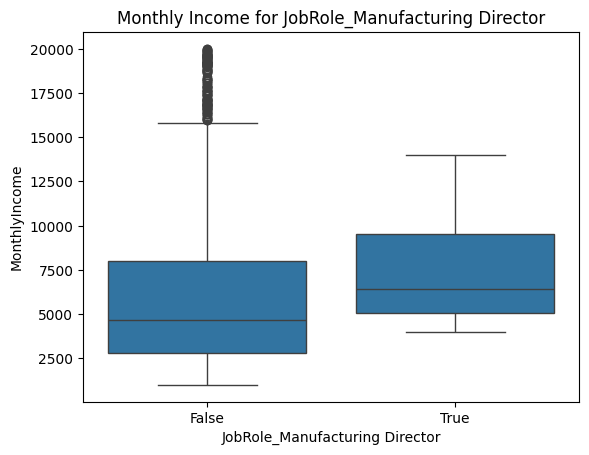

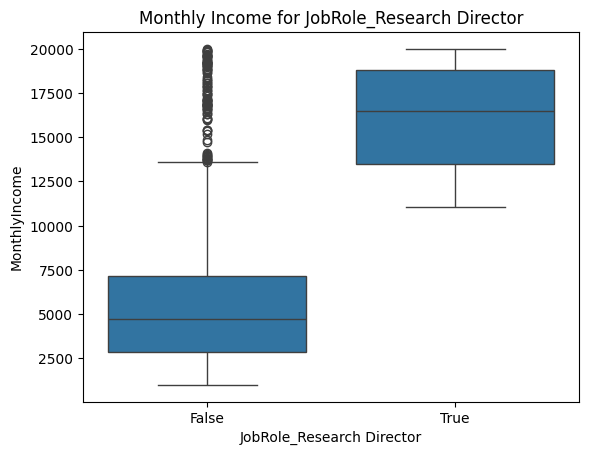

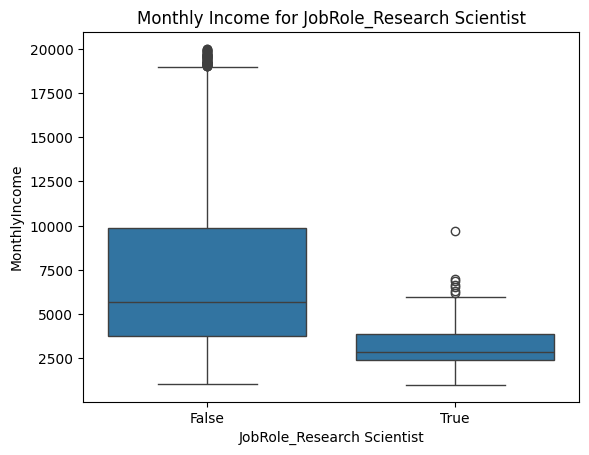

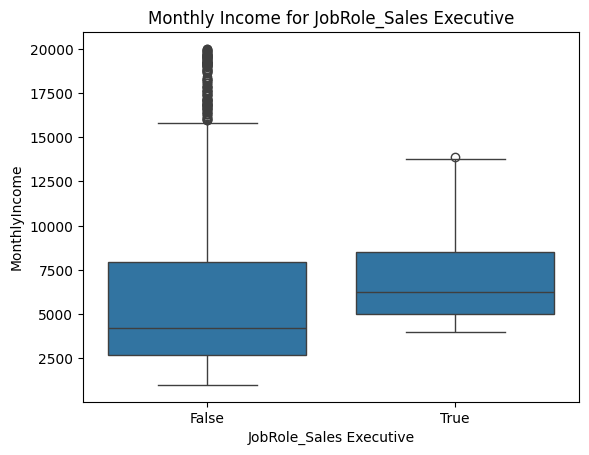

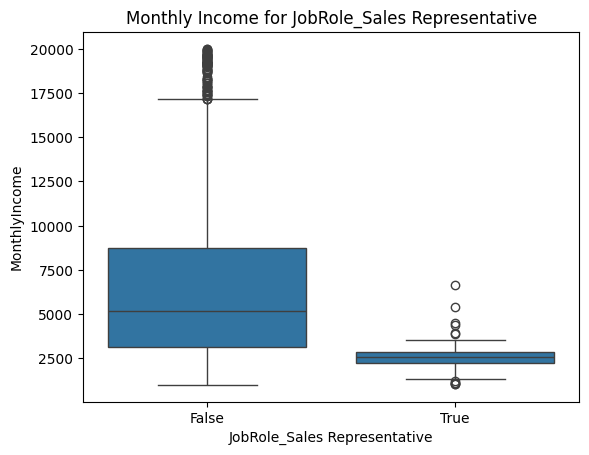

In [15]:
# Boxplot: Monthly Income by Job Role
import re
job_role_cols = [col for col in df.columns if re.match("JobRole_", col)]
for col in job_role_cols:
    sns.boxplot(x=df[col], y=df['MonthlyIncome'])
    plt.title(f'Monthly Income for {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# 1. Load the CSV file
df = pd.read_csv('D:/data_analyst/AnalyticsProjects/projects/employee_data.csv')

# Optional: Clean up column names (remove spaces/special characters)
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# 2. Define your MySQL connection details
db_user = 'root'
db_password = 'root'
db_host = 'localhost'
db_port = '3306'
db_name = 'employee_data'
table_name='employee'

# # 3. Create SQLAlchemy connection string
engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# 4. Send data to MySQL (it will auto-create the table if not exists)
try:
    df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)
    print(" Data uploaded successfully!")
except Exception as e:
    print(" Error uploading data:", e)